**Supervised Learning Project- Recell**

In [60]:
#Import all libraries
#We are importing first libraries for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Importing libraries for reading and manipulating the data
import pandas as pd
import numpy as np

In [62]:
#Importing libraries for stats 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Problem statement- The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it**

In [63]:
#load dataset
db=pd.read_csv('used_device_data.csv')

*The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below*

In [64]:
db

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [65]:
db.head()
#Displaying the first few rows of the data set

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [66]:
db.shape
#Checking the shape of the dataset

(3454, 15)

In [67]:
db.info()
#Lets check the data type in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [68]:
db.describe().T
#lets see the statistical summary of the dataset now

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [69]:
db.duplicated().count
#Looking for duplicates in the data
#As per the results given, data does not have any duplicates 

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool>

In [70]:
db.isnull().sum()
#As per the results, we have some missing values in the column main_camera_mp, selfie_camera_mp,int_memory,ram,battery,weight

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [71]:
db.isnull().sum().sum()
#We can see total of 202 values are missing in the dataset

202

In [72]:
df=db.copy()
#creating a copy of the original data so as to keep the original one unchanged

In [73]:
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [74]:
# Converting object data types to category
category_col = df.select_dtypes(exclude=np.number).columns.tolist()
df[category_col] = df[category_col].astype("category")

In [75]:
df.dtypes

brand_name               category
os                       category
screen_size               float64
4g                       category
5g                       category
main_camera_mp            float64
selfie_camera_mp          float64
int_memory                float64
ram                       float64
battery                   float64
weight                    float64
release_year                int64
days_used                   int64
normalized_used_price     float64
normalized_new_price      float64
dtype: object

**Lets begin by Univariate analysis of the dataset**

Text(0.5, 1.0, 'Various Phone brands')

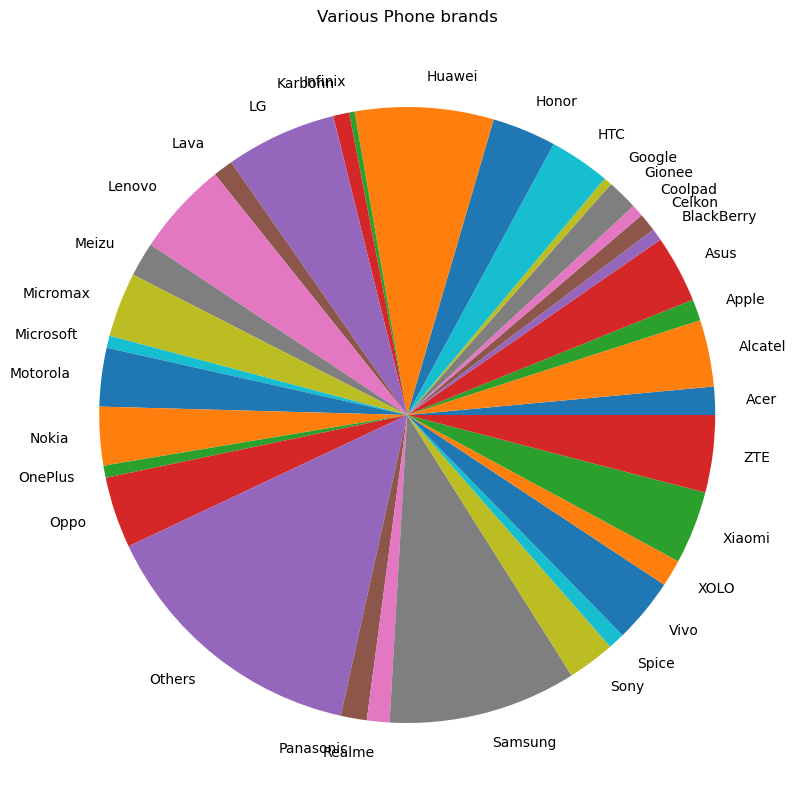

In [76]:
df.groupby('brand_name').size().plot(kind='pie', subplots=True ,figsize=(10,10))
plt.title('Various Phone brands')

**Most number of devices fall in category others, followed by Samsung**

Text(0.5, 1.0, 'os')

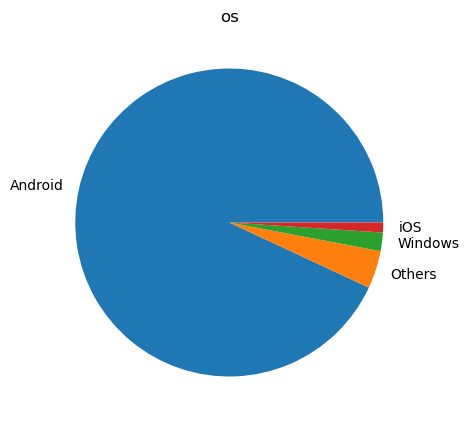

In [77]:
df.groupby('os').size().plot(kind='pie', subplots=True ,figsize=(5,5))
plt.title('os')

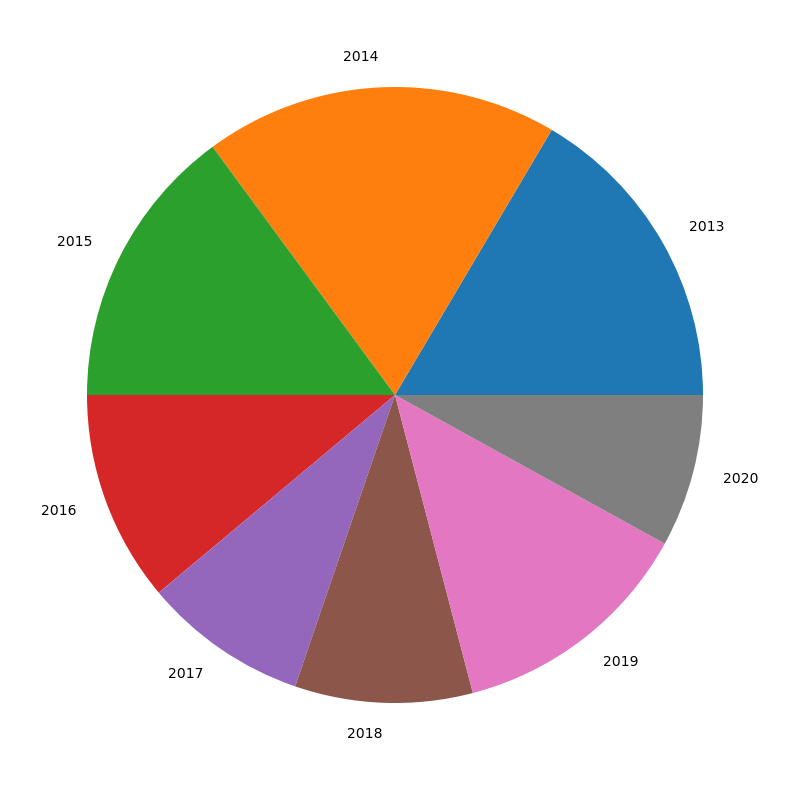

In [78]:
df.groupby('release_year').size().plot(kind='pie',subplots=True ,figsize=(10,10));
#This pie chart shows us the number of releases in each year with 2013-2014-2015 with approx. same number of releases. 

<Axes: xlabel='days_used'>

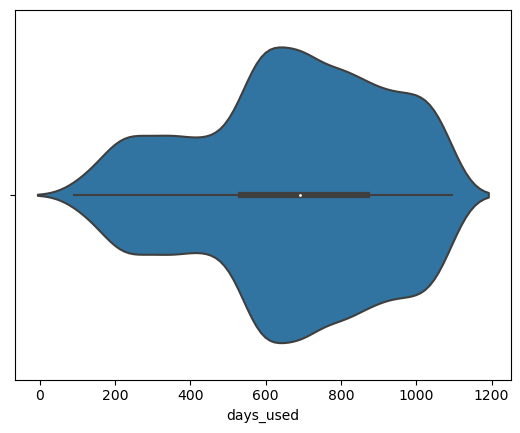

In [79]:
sns.violinplot(df,x="days_used")
#Median age of the devices is around 700 days.

**Most devices use Android OS**

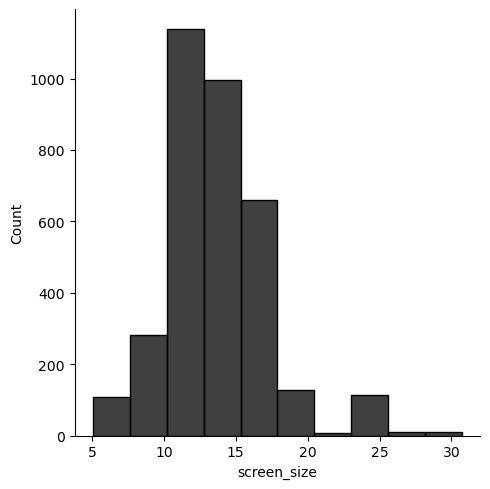

In [80]:
sns.displot(df['screen_size'], kde=False, color='Black',bins=10);

**Most common screensize is between 10-12**

<Axes: >

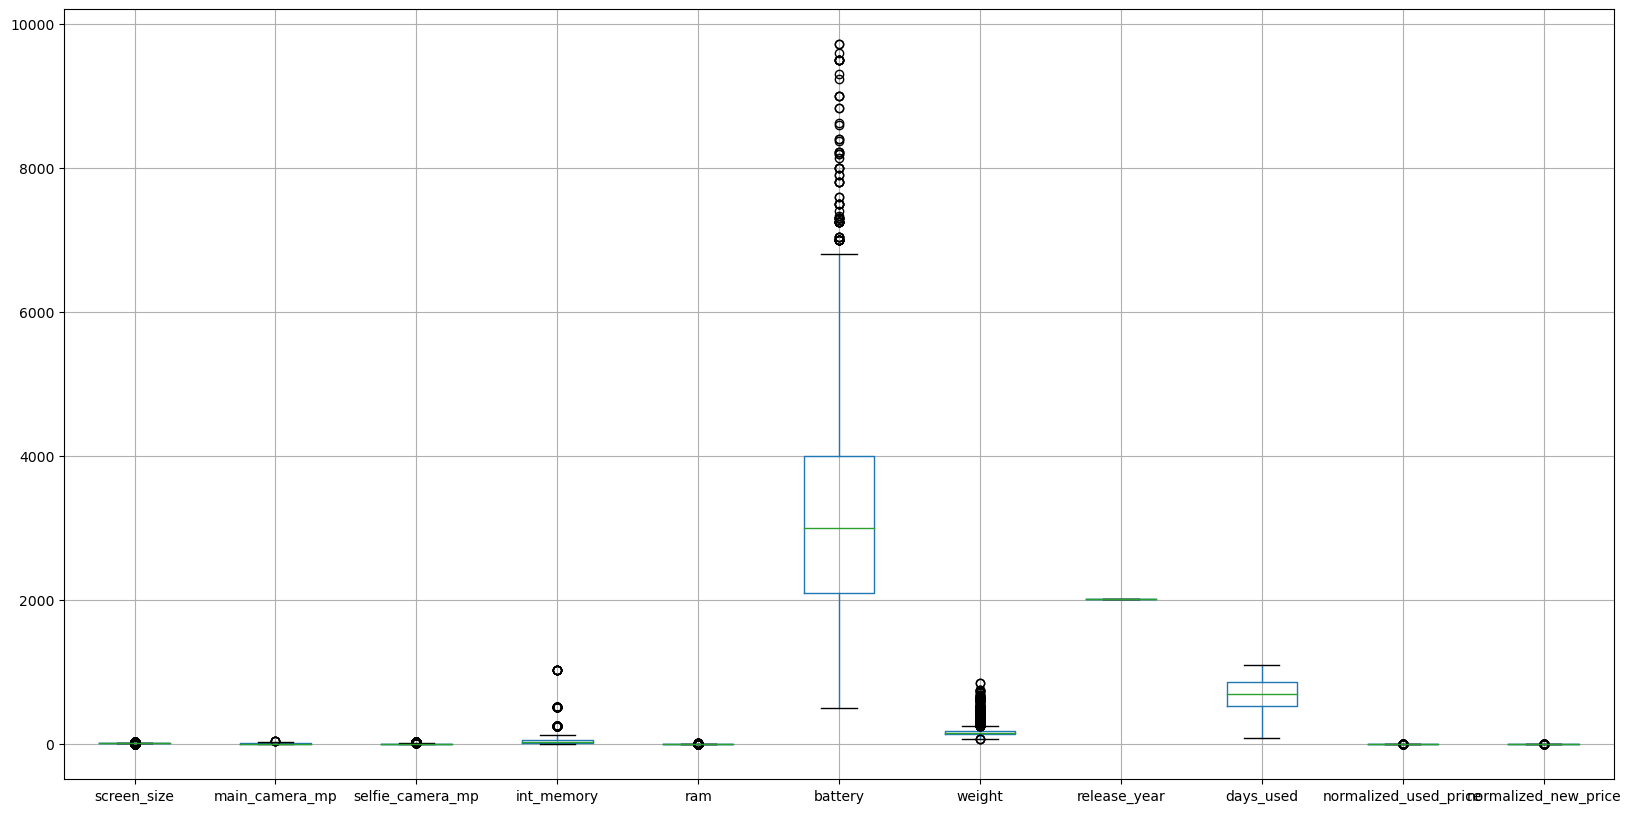

In [83]:
df.boxplot(figsize=(20,10))

**Conclusion- The following columns have outliers**
1. main_camera_mp
2.selfie_camera_mp
3.int_memory
4.ram
5.battery
6.weight.
**It is important to note here that the battery has considerable numbers of outliers in the data**


**Now lets start with bivariate analysis of the data**

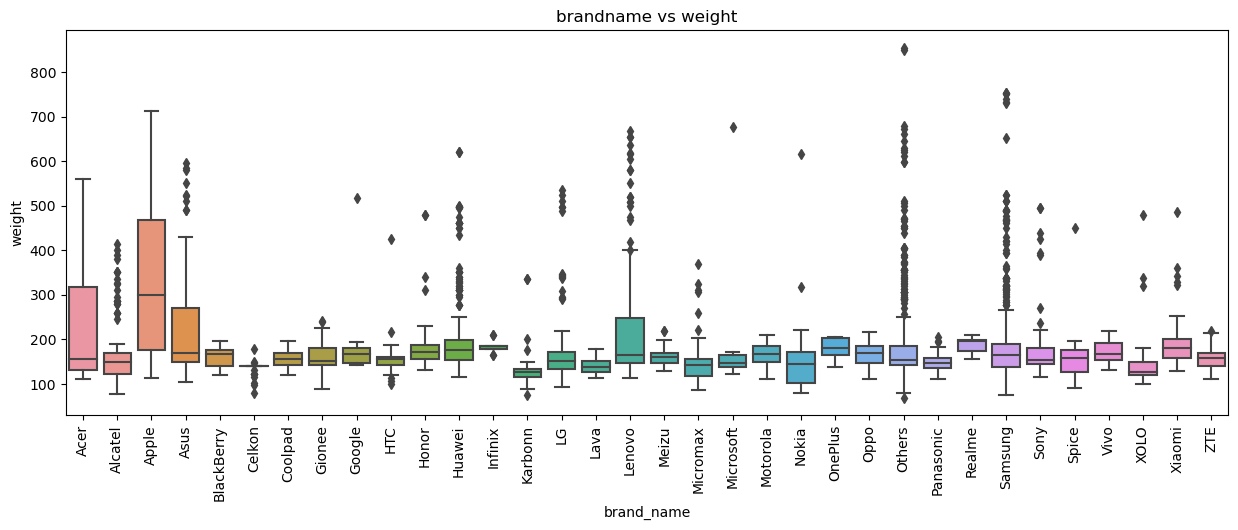

In [84]:
plt.figure(figsize=(15,5))
plt.title('brandname vs weight')
sns.boxplot(df,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()
#Box plot depicts various brands and their weights with median weight here

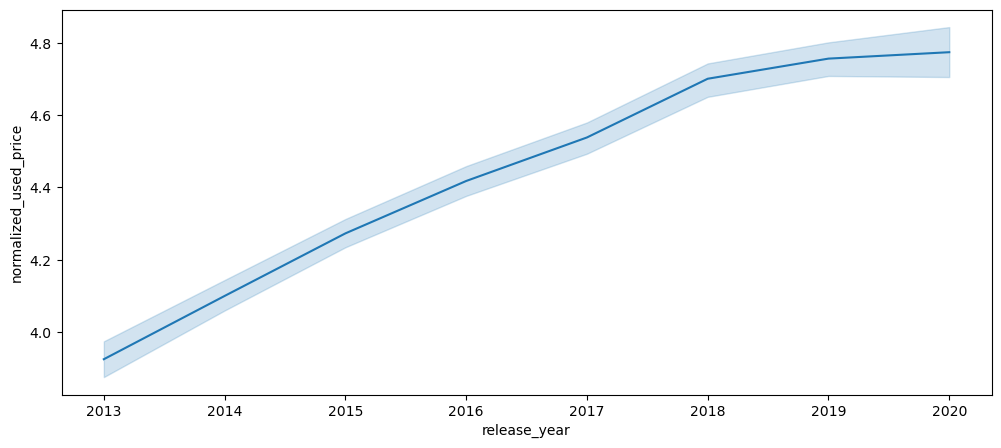

In [85]:
plt.figure(figsize=(12, 5))
sns.lineplot(df,x='release_year',y='normalized_used_price') 
plt.show()
#Normalized used price increased with the release year, hence we can deduce there is a positive relationship between both

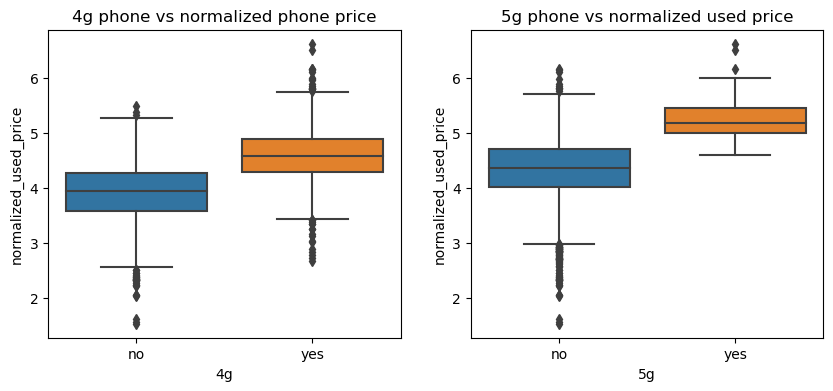

In [86]:
plt.figure(figsize=(10, 4)),
plt.subplot(121),
plt.title('4g phone vs normalized phone price')
sns.boxplot(data=df, x="4g", y="normalized_used_price"),
plt.subplot(122)
plt.title('5g phone vs normalized used price')
sns.boxplot(data=df, x="5g", y="normalized_used_price"),
plt.show()
#Boxplot depicting used prices against both 4g and non 4g, 5g and non 5g phone
#Used price is the high for both 4g and 5g phone with 5g phone having high median used price

<Figure size 1200x1200 with 0 Axes>

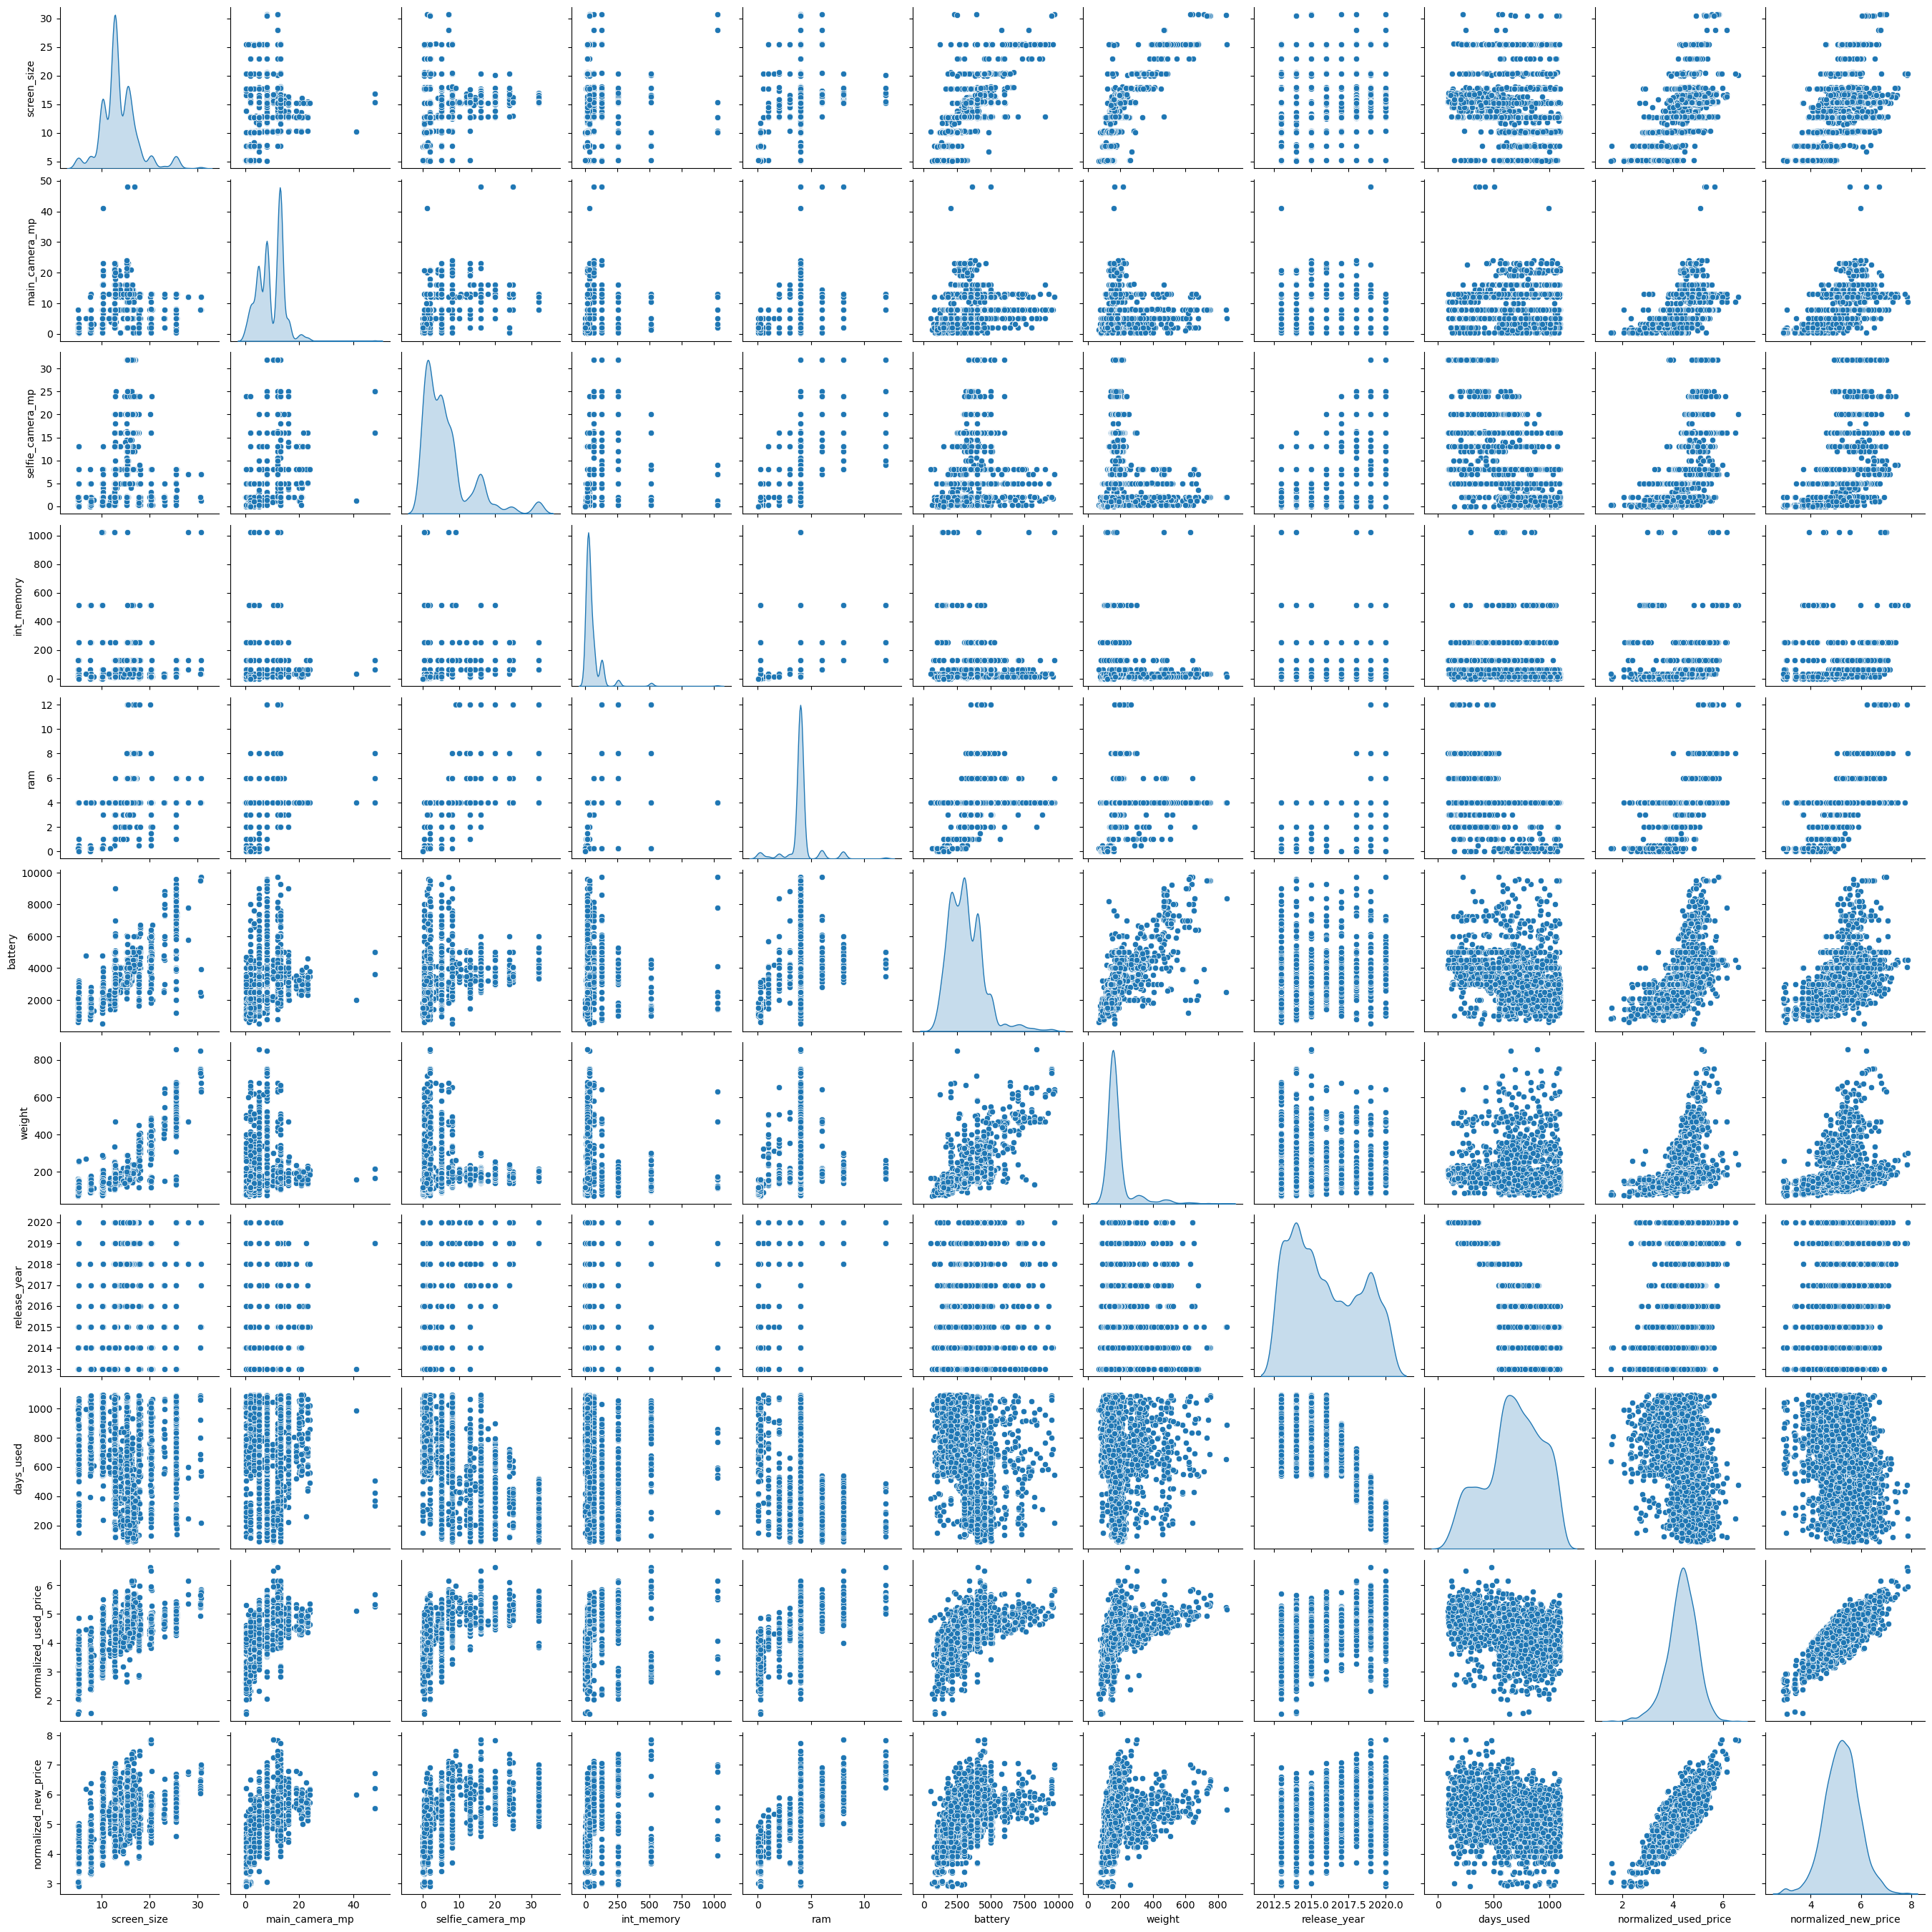

In [87]:
plt.figure(figsize=(12,12))
sns.pairplot(df,kind='scatter',diag_kind='kde')
#view the results by zooming in

**There seems to be a positive relationship between normalized_used_price with screensize, selfie camera mp,ram,weight, battery. There is a negative correlation with days used and used price**

**Positive correlation. As the screensize increases, the normalized used price of the phone is going up**

**There is a negative correlation. The phones used for more days will have a relatively lesser price**

In [88]:
corr=df.corr()
corr

C:\Users\akhil\AppData\Local\Temp\ipykernel_21600\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


<Axes: >

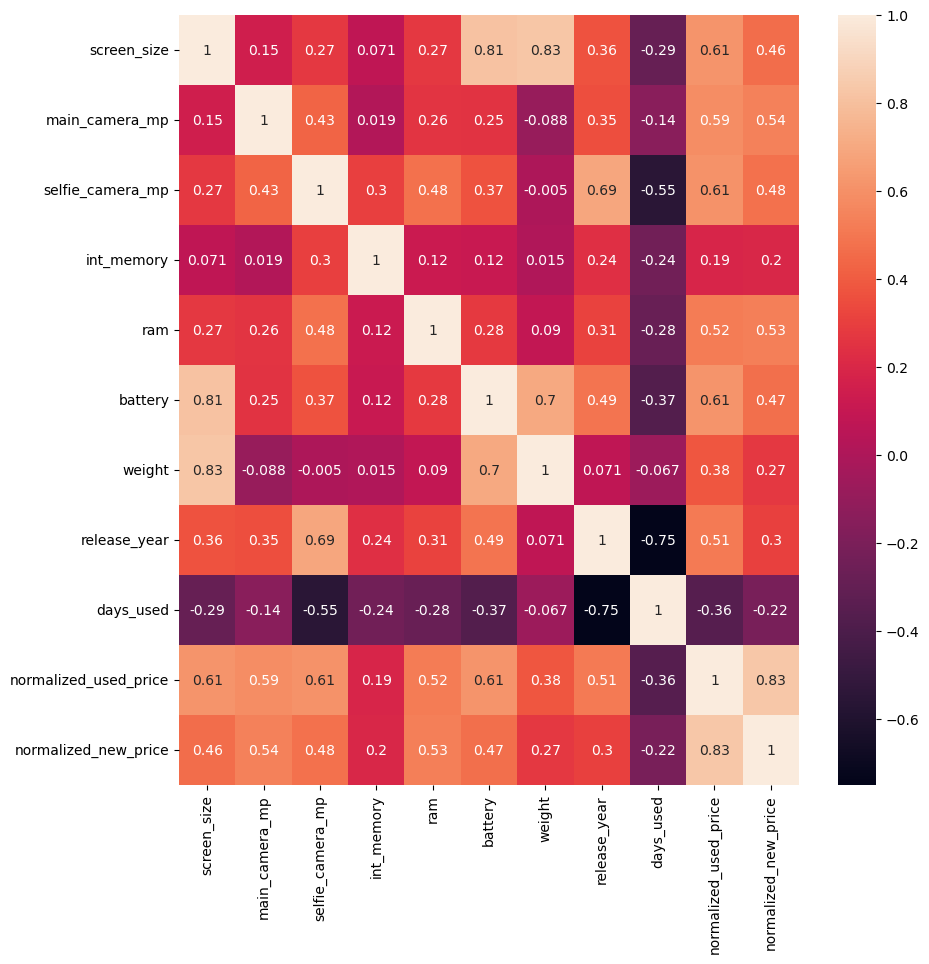

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

**There is a high positive correlation between used price and ram, main camera mp, screen size and battery. While the only negative correlation for used price lies with the days used**

**Lets now have a look at the preprocessing of the data. We need to make sure that there are no duplicate values**

In [90]:
df.duplicated().sum()

0

**No duplicated found in the data**

**Missing value check and treatment**

In [91]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Impute the missing values using groupby and the median**

In [92]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

for col in cols_impute:
    df[col] = df[col].fillna(value=df.groupby(['brand_name','release_year'])[col].transform("median"))

In [93]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**As shown, two columns dont have any missing values now, but we still have the four columns with the missing values**

In [94]:
cols_impute = ["main_camera_mp","selfie_camera_mp","battery","weight"]

for col in cols_impute:
    df[col] = df[col].fillna(value=df.groupby(['brand_name'])[col].transform("median"))

**Using groupby with only brand name column this time to impute the rest missing values**

In [95]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [96]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

**Finally we use the median function to fill the missing values in the main_camera_mp column**

In [97]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**There are no missing values in the dataset now**

### Feature Engineering

**Let's create a new column `years_since_release` from the `release_year` column,
    "- We will consider the year of data collection, 2021, as the baseline
    "- We will drop the `release_year` column**

In [98]:
df['years_since_release']=2021-df['release_year']

In [99]:
df.drop('release_year',axis=1,inplace=True)

In [100]:
df['years_since_release'].describe

<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
3449    2
3450    3
3451    1
3452    1
3453    1
Name: years_since_release, Length: 3454, dtype: int64>

**We have now replaced the column year_released with years_since_release in the dataset**

## Data preparation for modelling

We want to predict the normalized price of used devices
Before we proceed to build a model, we'll have to encode categorical features
We'll split the data into train and test to be able to evaluate the model that we build on the train data
We will build a Linear Regression model using the train data and then check it's performance

In [101]:
# Create dummy variables for the categorical variables
df = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

In [102]:
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [118]:
# defining X and y variables
X = df.drop(["normalized_used_price"], axis=1)
Y = df["normalized_used_price"]

In [119]:
X

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,13.0,8.0,64.0,6.0,5000.0,190.0,232,6.483872,2,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,541,6.251538,3,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.528829,1,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.624188,1,...,0,0,0,0,0,0,0,0,1,0


In [120]:
Y

0       4.307572
1       5.162097
2       5.111084
3       5.135387
4       4.389995
          ...   
3449    4.492337
3450    5.037732
3451    4.357350
3452    4.349762
3453    4.132122
Name: normalized_used_price, Length: 3454, dtype: float64

 **Splitting the data in 70:30 ratio for train to test data**


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [125]:
X_train, X_test, Y_train, Y_test

(      screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
 3026        10.29             8.0               0.3        16.0  4.0   1800.0   
 1525        15.34            13.0               5.0        32.0  4.0   4050.0   
 1128        12.70            13.0               5.0        32.0  4.0   2550.0   
 3003        12.83             8.0               5.0        16.0  4.0   3200.0   
 2907        12.88            13.0              16.0        16.0  4.0   2900.0   
 ...           ...             ...               ...         ...  ...      ...   
 2763        10.29             8.0               2.0        16.0  4.0   2100.0   
 905         10.29             5.0               0.3        16.0  4.0   1800.0   
 1096        15.77            13.0              24.0        64.0  4.0   3400.0   
 235         15.90            13.0              32.0       128.0  6.0   3750.0   
 1061        12.70            13.0               5.0        16.0  4.0   2300.0   
 
       weight 

In [126]:
# check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [127]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [128]:
regression_model.coef_

array([ 2.44032962e-02,  2.08248528e-02,  1.34924881e-02,  1.15155413e-04,
        2.29520683e-02, -1.68870003e-05,  9.97820270e-04,  4.21629920e-05,
        4.31086333e-01, -2.36640523e-02,  1.53676063e-02, -3.77743947e-03,
        1.50648635e-02, -3.00096563e-02, -4.68190767e-02,  2.09098928e-02,
        4.47619088e-02, -3.26117207e-02, -1.30347927e-02,  3.16504139e-02,
       -2.03379092e-03,  1.63312677e-01,  9.42745571e-02, -1.31753046e-02,
        3.31915501e-02,  4.53818097e-02, -1.28778000e-02, -3.36990606e-02,
        9.52302669e-02, -1.12371391e-02,  7.18816218e-02,  7.08852897e-02,
        1.24351753e-02, -8.01326786e-03,  5.62803351e-02,  3.19002247e-02,
       -3.13160899e-02, -6.15832407e-02, -1.47085954e-02, -1.54320576e-02,
        1.51872091e-02,  8.69216707e-02, -5.71596294e-03, -5.10365398e-02,
       -2.07183531e-02, -6.63311039e-02,  5.27552847e-02, -7.14418076e-02])

In [129]:
regression_model.intercept_

1.3156262542379902

In [130]:
# dataframe to show the model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.024403
main_camera_mp,0.020825
selfie_camera_mp,0.013492
int_memory,0.000115
ram,0.022952
battery,-0.000017
weight,0.000998
days_used,0.000042
normalized_new_price,0.431086
years_since_release,-0.023664


**We have calculated the coefficients for the equation(Y=A+B1X1+B2X2+...........B52X52) Where intercept A is equal to 1.288484 and coefficients B1=0.00244,B2=0.00208.......**

In [149]:
# function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [151]:
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    regression_model, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841742,4.326841


In [153]:
regression_model.score(X_train, y_train)

0.8448860078512486

In [152]:
regression_model.score(X_test, y_test)

0.8424791238858986

In [154]:
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

In [156]:
olsmodel = sm.OLS(y_train,X_train1) ## Complete the code to fit OLS model\n",
olsres=olsmodel.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                           20:43:50   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Checking Linear Regression Assumptions
We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

## TEST FOR MULTICOLLINEARITY


Variance Inflation Factor (VIF):

General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity. If VIF is between 5 and 10, we say there is moderate multicollinearity. If VIF is exceeding 10, it shows signs of high multicollinearity.

In [145]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

In [146]:
checking_vif(X_train1)

,feature,VIF
0,const,227.74
1,screen_size,7.68
2,main_camera_mp,2.29
3,selfie_camera_mp,2.81
4,int_memory,1.36
5,ram,2.28
6,battery,4.08
7,weight,6.40
8,days_used,2.66
9,normalized_new_price,3.12


**REMOVING MULTICOLLINEARITY**

Let's define a function that will help us do this

In [147]:
# Let's define a function that will help us do this.

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
            }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [157]:
col_list = [
    "screen_size",
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,brand_name_LG,0.841803,0.232205
4,os_iOS,0.841795,0.232211
5,brand_name_Samsung,0.841774,0.232227
6,screen_size,0.838381,0.234703


**As per the summary, our Rsquared value is 0.845 whereas adjusted Raquared value is 0.842. We can drop all the above mentioned columns except the screen_size**

In [158]:
# Drop brand_name_Huawei

col_to_drop = "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,169.86
1,screen_size,7.67
2,main_camera_mp,2.28
3,selfie_camera_mp,2.81
4,int_memory,1.36
5,ram,2.28
6,battery,4.08
7,weight,6.40
8,days_used,2.66
9,normalized_new_price,3.12


In [159]:
#Dropping brand name Apple

col_to_drop = "brand_name_Apple"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,168.02
1,screen_size,7.63
2,main_camera_mp,2.28
3,selfie_camera_mp,2.78
4,int_memory,1.36
5,ram,2.27
6,battery,4.08
7,weight,6.39
8,days_used,2.66
9,normalized_new_price,3.10


**We cannot remove the remaining two variable with high VIF i.e weight and screen_size as they influence the adj_rsquared value of the model.The above predictors have little to no multicollinearity and the assumption is satisfied.**



In [160]:
olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())
#Model 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.6
Date:                   Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                           21:01:56   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -153.7
Df Residuals:                       2370   BIC:                             118.4
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [161]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [162]:
# Use only the variables with p-values less than 0.05 to train model

X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]


In [163]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                           21:04:32   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [164]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855243,0.232245
1525,4.448399,4.628813,-0.180413
1128,4.315353,4.280778,0.034574
3003,4.282068,4.206270,0.075798
2907,4.456438,4.470315,-0.013877


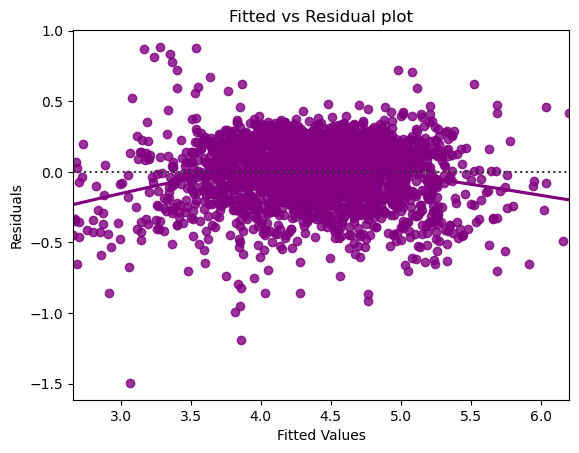

In [165]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

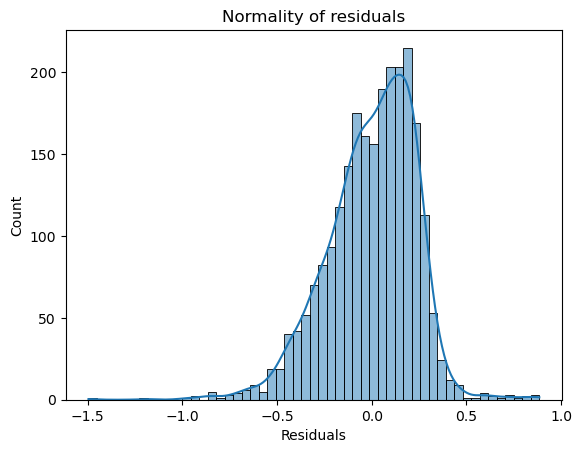

In [166]:
# histogram plot of the residual
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

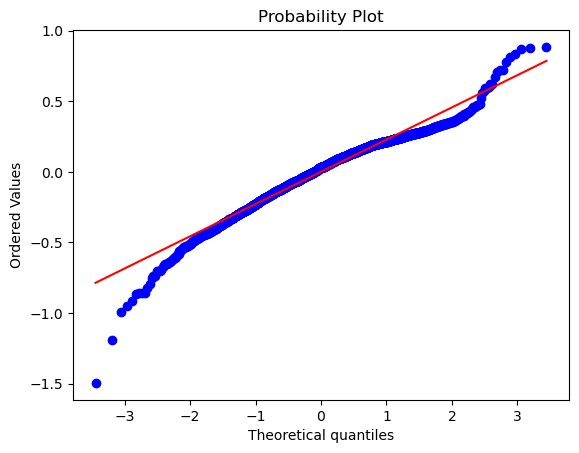

In [167]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [168]:
# Shipiro test for normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690964221954346, pvalue=2.131064442768085e-22)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal. So, the assumption is satisfied.

**Lets now check for the multicollinearity using Variation inflation factor** 

In [169]:
# goldfeldquandt test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.0438035947010254), ('p-value', 0.22944475832467995)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary


In [171]:
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train4.columns[i], ")")

Used Phone Price = 1.3777 + ( 0.0256 )*( screen_size ) +  ( 0.0212 )*( main_camera_mp ) +  ( 0.014 )*( selfie_camera_mp ) +  ( 0.0175 )*( ram ) +  ( -0.0 )*( battery ) +  ( 0.0009 )*( weight ) +  ( 0.4222 )*( normalized_new_price ) +  ( -0.0199 )*( years_since_release ) +  ( 0.0492 )*( brand_name_Lenovo ) +  ( 0.0675 )*( brand_name_Nokia ) +  ( 0.0893 )*( brand_name_Xiaomi ) +  ( -0.0704 )*( os_Others ) +  ( 0.0499 )*( 4g_yes )


In [172]:
# predictions on the test set
pred = olsmod2.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373741
2341,3.696103,3.962922
1913,3.592093,3.690961
688,4.306495,4.116687
650,4.522115,5.137917
2291,4.259294,4.395249
40,4.997685,5.434104
1884,3.875359,4.054845
2538,4.206631,4.047439
45,5.380450,5.276715


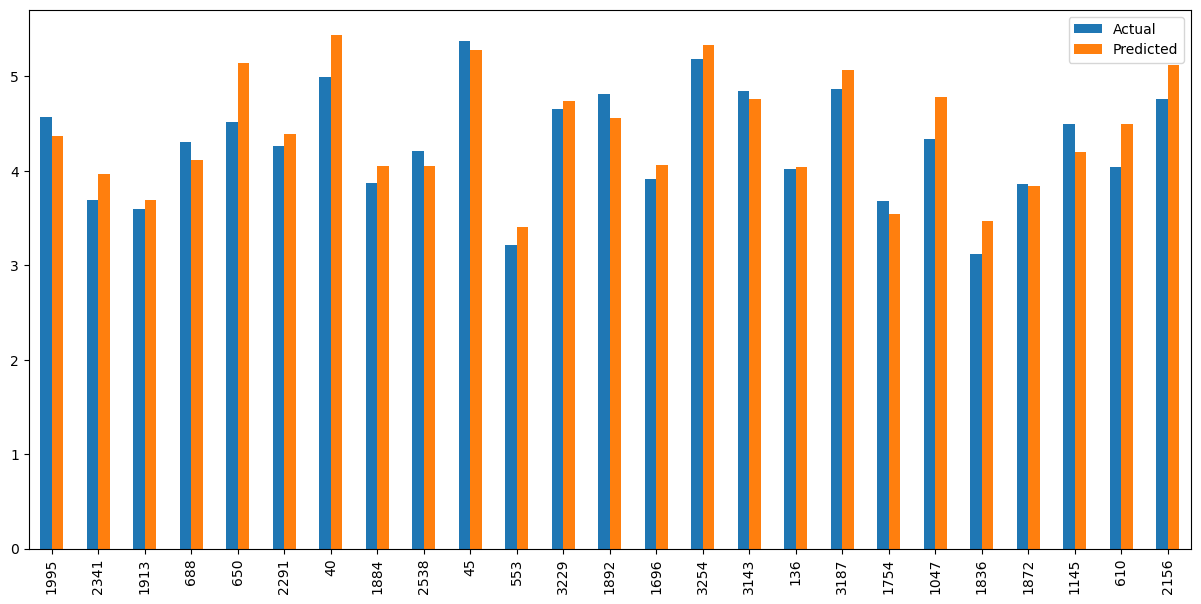

In [173]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [174]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


In [175]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236807,0.18348,0.844523,0.842393,4.467055


In [176]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                           21:10:47   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## INSIGHTS


Newly released phones have high used price, which makes sense because the newer the phone, the higher the new price hence used price would be affected and the older the phone, the lower the used price. since most customers want phones in demand.

release_year, days_used, new_price, brand_name_Gionee, whether 4g or 5g seem to be affect the used price. this is understandable the longer the phone is used, we cant determine its originality and its wholeness hence a decrease in used price which negatively impacts the amount it could be sold for used. 5g comes more with new phones, hence it would also shoot up in a high used price since its new.

Phones with 4g and Gionee brand phones have lower the used price. they seem to not be a demand for customers and should probably be discontinued.

## RECOMMENDATIONS

We can use the model to make predictions of the price of used phone. Newly released phones should also be focused on as they have a high resale price. 5g network enabled phones have high resale price and should be focused on rather than those with less 4g phones an example is Gionee phones. i recommend discontinuation of Gionee phones.

Future data collections need to be done on the age of customers purchasing products, since age could be a major drive. millenial customers may tend to want a 5g or a newer version.

Future data collection on income could also be done to know what more high income customer want.